<a href="https://colab.research.google.com/github/rajdeepbanerjee-git/JNCLectures_Intro_to_ML/blob/main/Week3/MLE_vs_lin_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math


In [ ]:
# creating the dataset

x_train = np.array([0.09291784,0.46809093,0.93089486,0.67612654,0.73441752,0.86847339,\
                   0.49873225,0.51083168,0.18343972,0.99380898,0.27840809,0.38028817,\
                   0.12055708,0.56715537,0.92005746,0.77072270,0.85278176,0.05315950,\
                   0.87168699,0.58858043])
y_train = np.array([-0.25934537,0.18195445,0.651270150,0.13921448,0.09366691,0.30567674,\
                    0.372291170,0.20716968,-0.08131792,0.51187806,0.16943738,0.3994327,\
                    0.019062570,0.55820410,0.452564960,-0.1183121,0.02957665,-1.24354444, \
                    0.248038840,0.26824970])

In [ ]:
# define model: phi*x + const

def lin_reg(x, phi, const = 0.2):
  return phi*x + const

In [ ]:
# loss

def mean_squared_loss(y, y_pred):
  return np.mean((y - y_pred)**2)

In [ ]:
# derivative of loss

def delta_loss(y, y_pred):
  diff = np.absolute(y - y_pred)
  return 2*diff

In [ ]:
# basic stochastic gradient descent

n_epoch = 20
phi = 0.5
const = 0.5
l_r = 0.01
y_pred = np.zeros(len(x_train))
epoch_loss = []

for epoch in range(n_epoch):
  for i in range(len(x_train)):
    y_pred[i] = lin_reg(x = x_train[i], phi = phi, const = const)
    phi = phi - l_r * delta_loss(y_train[i], y_pred[i]) * x_train[i]
    const = const - l_r * delta_loss(y_train[i], y_pred[i])

  epoch_loss_params = {'epoch': epoch,
                       'epoch_loss': mean_squared_loss(y_train, y_pred = y_pred),
                       'phi': phi,
                       'const': const}
  epoch_loss.append(epoch_loss_params)
  print(f"epoch: {epoch}, loss: {epoch_loss_params['epoch_loss']}")


epoch: 0, loss: 0.36878102216106173
epoch: 1, loss: 0.2027612349395332
epoch: 2, loss: 0.1407238953587742
epoch: 3, loss: 0.11963142769576462
epoch: 4, loss: 0.12570093329302942
epoch: 5, loss: 0.17691388544304137
epoch: 6, loss: 0.34106185391518773
epoch: 7, loss: 0.8429200090093868
epoch: 8, loss: 2.3004129715950388
epoch: 9, loss: 6.461863030628156
epoch: 10, loss: 18.506109017074948
epoch: 11, loss: 53.33437604552972
epoch: 12, loss: 153.99237705434558
epoch: 13, loss: 444.8110459549322
epoch: 14, loss: 1284.8727657368593
epoch: 15, loss: 3711.2016038212896
epoch: 16, loss: 10718.624615652661
epoch: 17, loss: 30955.779948091884
epoch: 18, loss: 89398.48100657457
epoch: 19, loss: 258172.2835335262


In [ ]:
# epoch 3 has lowest loss:
results = pd.DataFrame(epoch_loss)
results[results['epoch'] == 3]

,epoch,epoch_loss,phi,const
3,3,0.119631,0.258462,-0.019809


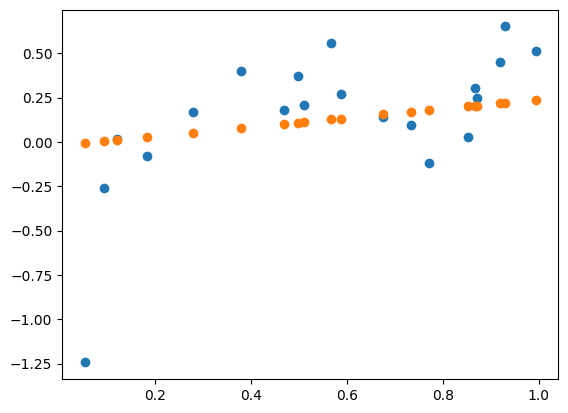

In [ ]:
#plot final results
final_phi = results[results['epoch'] == 3]['phi'].item()
final_const = results[results['epoch'] == 3]['const'].item()
final_pred = lin_reg(x = x_train, phi = final_phi, const = final_const)

plt.scatter(x_train, y_train)
plt.scatter(x_train, final_pred)

Can you convert the above code to batch gradient descent?

In [ ]:
# basic stochastic gradient descent

n_epoch = 50
phi = 0.5
const = 0.5
l_r = 0.01
y_pred = np.zeros(len(x_train))
epoch_loss = []

for epoch in range(n_epoch):
  # just remove [i] and use average of the array !
  y_pred = lin_reg(x = x_train, phi = phi, const = const)
  phi = phi - l_r * (delta_loss(y_train, y_pred) * x_train).mean()
  const = const - l_r * delta_loss(y_train, y_pred).mean()

  epoch_loss_params = {'epoch': epoch,
                       'epoch_loss': mean_squared_loss(y_train, y_pred = y_pred),
                       'phi': phi,
                       'const': const}
  epoch_loss.append(epoch_loss_params)
  print(f"epoch: {epoch}, loss: {epoch_loss_params['epoch_loss']}")


epoch: 0, loss: 0.5133428735341812
epoch: 1, loss: 0.49277360062257813
epoch: 2, loss: 0.4732923125411824
epoch: 3, loss: 0.4548412631348319
epoch: 4, loss: 0.43736577171825763
epoch: 5, loss: 0.42081406034344637
epoch: 6, loss: 0.40513709970578216
epoch: 7, loss: 0.3902884632303748
epoch: 8, loss: 0.376224188904321
epoch: 9, loss: 0.3629026484437002
epoch: 10, loss: 0.35028442340593674
epoch: 11, loss: 0.33833218787882735
epoch: 12, loss: 0.3270105973971064
epoch: 13, loss: 0.3162861837559575
epoch: 14, loss: 0.3061272554084252
epoch: 15, loss: 0.2965038031503037
epoch: 16, loss: 0.28738741081181124
epoch: 17, loss: 0.2787511706902622
epoch: 18, loss: 0.270562452599485
epoch: 19, loss: 0.26278416372036467
epoch: 20, loss: 0.25539612067297995
epoch: 21, loss: 0.24837912013518326
epoch: 22, loss: 0.24171489155691211
epoch: 23, loss: 0.23537748958632823
epoch: 24, loss: 0.22933909177590758
epoch: 25, loss: 0.22358658276440346
epoch: 26, loss: 0.2181074027803654
epoch: 27, loss: 0.2128880

In [ ]:
# epoch 19 has lowest loss:
results = pd.DataFrame(epoch_loss)
results[results['epoch'] == 49]

,epoch,epoch_loss,phi,const
49,49,0.143466,0.317593,0.119307


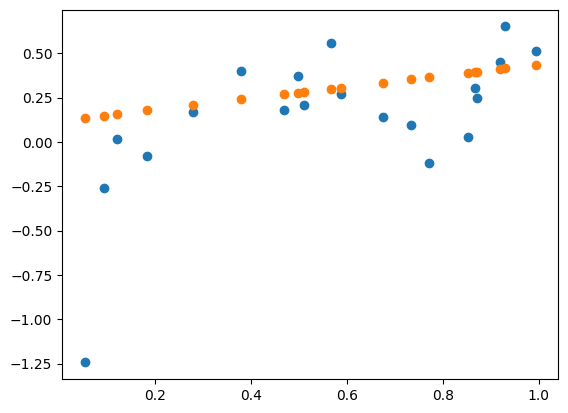

In [ ]:
#plot final results
final_phi = results[results['epoch'] == 49]['phi'].item()
final_const = results[results['epoch'] == 49]['const'].item()
final_pred = lin_reg(x = x_train, phi = final_phi, const = final_const)

plt.scatter(x_train, y_train)
plt.scatter(x_train, final_pred)

Now, let's try the MLE apprach: <br>
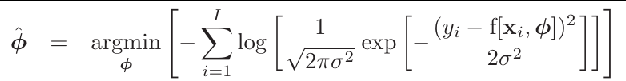

In [ ]:
# let's get a range of phi and a const
phi_range = np.arange(0.0, 1.0, 0.01)
const = 0.1
sigma = 1.0

In [ ]:
# using above equation
def NLL_loss(y_train, x_train, phi, const):
  prefactor = 1/np.sqrt(2*math.pi*(sigma**2))
  exponential = np.exp(-(y_train - lin_reg(x = x_train, phi = phi, const = const))**2 / 2*(sigma)**2)
  loss = -np.sum(np.log(prefactor*exponential))

  return loss


In [ ]:
nll_loss = []
for phi in phi_range:
  loss = np.round(NLL_loss(y_train=y_train, x_train=x_train, phi=phi, const = const), 4)
  nll_loss.append(loss)
  print(f"phi: {np.round(phi, 2)}, loss: {loss}")

min_index = np.argmin(np.array(nll_loss))
print(f"best phi for which NLL is min: {phi_range[min_index]}")

phi: 0.0, loss: 19.9363
phi: 0.01, loss: 19.9175
phi: 0.02, loss: 19.8995
phi: 0.03, loss: 19.8823
phi: 0.04, loss: 19.866
phi: 0.05, loss: 19.8505
phi: 0.06, loss: 19.8358
phi: 0.07, loss: 19.8219
phi: 0.08, loss: 19.8089
phi: 0.09, loss: 19.7966
phi: 0.1, loss: 19.7852
phi: 0.11, loss: 19.7746
phi: 0.12, loss: 19.7648
phi: 0.13, loss: 19.7559
phi: 0.14, loss: 19.7478
phi: 0.15, loss: 19.7405
phi: 0.16, loss: 19.734
phi: 0.17, loss: 19.7283
phi: 0.18, loss: 19.7235
phi: 0.19, loss: 19.7194
phi: 0.2, loss: 19.7162
phi: 0.21, loss: 19.7139
phi: 0.22, loss: 19.7123
phi: 0.23, loss: 19.7116
phi: 0.24, loss: 19.7117
phi: 0.25, loss: 19.7126
phi: 0.26, loss: 19.7143
phi: 0.27, loss: 19.7168
phi: 0.28, loss: 19.7202
phi: 0.29, loss: 19.7244
phi: 0.3, loss: 19.7294
phi: 0.31, loss: 19.7352
phi: 0.32, loss: 19.7419
phi: 0.33, loss: 19.7494
phi: 0.34, loss: 19.7577
phi: 0.35, loss: 19.7668
phi: 0.36, loss: 19.7767
phi: 0.37, loss: 19.7875
phi: 0.38, loss: 19.799
phi: 0.39, loss: 19.8114
phi: 0.

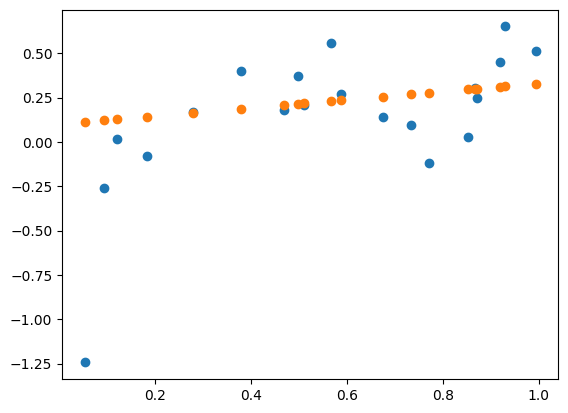

In [ ]:
# plot results
final_pred = lin_reg(x = x_train, phi = 0.23, const = const)

plt.scatter(x_train, y_train)
plt.scatter(x_train, final_pred)
